In [1]:
import numpy as np
import pickle
import PIL
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from detectron2.engine.defaults import DefaultPredictor

import os






** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
def load_trained_nn(pickle_file):
    """
    This function loads the trained nearual network from
    the local .pkl file as a predictor
    Input:
        - pickle_file: .pkl file containing the configurations
                        of the neural network that can be loaded
                        into Detectron2 Default Predictor
    Output:
        - predictor: Detectron2 DefualtPredictor with the
                     weights ad parameters from the pickle
                     file
    """
    
    # Load the configurations from the .pkl file
    with open(pickle_file, 'rb') as file:
        # Assert the input type
        assert os.path.splitext(pickle_file)[1] == ".pkl", "Input has the wrong file type. A pickle file is required."
        cfg = pickle.load(file)
    # Use Default predictor to load the pretrained NN
    predictor = DefaultPredictor(cfg)
    return predictor

In [6]:
def predict_discharge_curve(pickle_file, img_array):
    """
    This function loads the pretrained nueral network and its 
    configuration from a pickle file, and pass the input image
    through the nn to predict the target class.
    Input:
        - pickle_file: .pkl file containing the configurations 
                       of the trained neural network that can be
                       loaded into Detectron2 DefaultPredictor
        - PNG_image: .png image file to make prediction on
    Output:
        - predict_dict: a list of dictionaries that contains the
                        predicted masks
    """
    # Load the neural network as .pkl file
    with open(pickle_file, 'rb') as file:
        # Assert the input type
        assert os.path.splitext(pickle_file)[1] == ".pkl", "Input has the wrong file type. A pickle file is required."
        cfg = pickle.load(file)
    # Use Default predictor to load the pretrained NN
    predictor = DefaultPredictor(cfg)
    BGR_image = read_img_to_BGR(img_array)
    predict_dict = predictor(BGR_image)
    return predict_dict

In [12]:
"""
 There is no unit tests for predict_discharge_curve() and load_trained_nn()
 becasue they require the neural network file, and we do not have space on
 Github to store the nn model file. 

"""


'\n There is no unit tests for predict_discharge_curve() and load_trained_nn()\n becasue they require the neural network file, and we do not have space on\n Github to store the nn model file. \n\n'

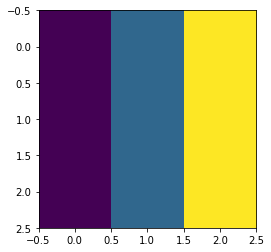

In [42]:
#img_array = np.array([[[1,1,1],[0,0,0],[0.1,0.1,0.1]],[[1,1,1],[0,0,0],[0.5,0.5,0.5]],[[1,1,1],[0,0,0],[0.4,0.4,0.4]]])
#img_array = np.array([[[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]],[[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]],[[0.4,0.4,0.4],[0.4,0.4,0.4],[0.4,0.4,0.4]]])
img_array = np.array([[0.2,0.3,0.5],
                      [0.2,0.3,0.5],
                      [0.2,0.3,0.5]])

#img_array = np.array([[[0.1,0.1,0.1],[0.1,0.1,0.1]],[[0.5,0.5,0.5],[0.5,0.5,0.5]],[[0.4,0.4,0.4],[0.4,0.4,0.4]]])

#img_bw = np.array()
img_array.shape
plt.imshow(img_array)

In [17]:
def read_img_to_BGR(img_array):
    """
    This functions read RGB image array into BGR nd array. If the input image
    is black and white, the numpy array will be stacked to the shape
    (image_width, image_height, 3)
    Input:
        - image_file: .png image file
    Output: 
        - BGR_img: nd array with size (image_height, image_width, 3)
    """
    # If B&W, convert to shape (W,H,3)
    if len(img_array.shape) == 2:
        img_array = np.stack((img_array,img_array,img_array), axis=2)
    if len(img_array.shape) == 3:
        pass
    else:
        print("Input image array does not have the correct shape")
    # Convert to BGR
    BGR_img = np.empty((img_array.shape[0],img_array.shape[1],3))
    BGR_img[:,:,0] = img_array[:,:,2]
    BGR_img[:,:,1] = img_array[:,:,1]
    BGR_img[:,:,2] = img_array[:,:,0]
    return BGR_img


In [46]:
def test_read_img_to_BGR():
    """
    Test read_img_to_BGR() function
    """
    img_array = np.array([[0.2,0.3,0.5],
                          [0.2,0.3,0.5],
                          [0.2,0.3,0.5]])
    result = read_img_to_BGR(img_array)
    # Assert that balck and white img array is concatenated to 3 layers
    assert np.isclose(len(result.shape),3), "Unexpected result from test"
    # Assert that balck and white img array is concatenated correctly
    assert np.allclose(result[0],result[1]), "Unexpected result from test"
    assert np.allclose(result[0],result[2]), "Unexpected result from test"    
    return

In [47]:
test_read_img_to_BGR()

In [57]:
def show_output_img_and_mask(PNG_image, prediction):
    """
    This function shows the image and the mask from a .json file.
    Input: 
        - PNG_image: .png file of the input image
        - prediction: output prediction of the neural network
    Output:
        - Inline plot with image and predicted masks
    """
    assert os.path.splitext(PNG_image)[1] == ".png", "Input has the wrong file type. A .png image is required."
    assert isinstance(prediction, dict), "Input prediction varialbe is not a dicitonary"
    mask = prediction["instances"].pred_masks
    mask_array = np.array(mask)
    im = Image.open(PNG_image)
    img_array = np.array(im)
    # Return notice if no instance is predicted
    if np.size(mask_array) == 0:
        print("No instance predicted, showing only the image")
        plt.imshow(img_array,alpha=1)
    for mask in range(mask_array.shape[0]):
        plt.figure()
        plt.imshow(img_array,alpha=1)
        plt.imshow(mask_array[mask,:,:],alpha=0.8)